In [1]:
import os
os.chdir("D:/gaming_ds/")
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

from datetime import datetime, timedelta
import datetime

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style("darkgrid")

In [2]:
os.getcwd()

'D:\\gaming_ds'

`blueWins`: 1 if the blue team has won 0 otherwise <br>
`blueWardsPlaced`: Number of warding totems placed by the blue team on the map <br>
`blueWardsDestroyed`: Number of enemy warding totems the blue team has destroyed <br>
`blueFirstBlood`: First kill of the game. 1 if the blue team did the first kill, 0 otherwise <br>
`blueKills`: Number of enemies killed by the blue team <br>
`blueDeaths`: Number of deaths (blue team) <br>
`blueAssists`: Number of kill assists (blue team) <br>
`blueEliteMonsters`: Number of elite monsters killed by the blue team (Dragons and Heralds) <br>
`blueDragons`: Number of dragons killed by the blue team <br>
`blueHeralds`: Number of heralds killed by the blue team <br>
`blueTowersDestroyed`: Number of structures destroyed by the blue team (towers...) <br>
`blueTotalGold`: Blue team total gold <br>
`blueAvgLevel`: Blue team average champion level <br>
`blueTotalExperience`: Blue team total experience <br>
`blueTotalMinionsKilled`: Blue team total minions killed (CS) <br>
`blueTotalJungleMinionsKilled`: Blue team total jungle monsters killed <br>
`blueGoldDiff`: Blue team gold difference compared to the enemy team <br>
`blueExperienceDiff`: Blue team experience difference compared to the enemy team <br>
`blueCSPerMin`: Blue team CS (minions) per minute <br>
`blueGoldPerMin`: Blue team gold per minute <br>
`redWardsPlaced`: Number of warding totems placed by the red team on the map <br>
`redWardsDestroyed`: Number of enemy warding totems the red team has destroyed <br>
`redFirstBlood`: First kill of the game. 1 if the red team did the first kill, 0 otherwise <br>
`redKills`: Number of enemies killed by the red team <br>
`redDeaths`: Number of deaths (red team) <br>
`redAssists`: Number of kill assists (red team) <br>
`redEliteMonsters`: Number of elite monsters killed by the red team (Dragons and Heralds) <br>
`redDragons`: Number of dragons killed by the red team <br>
`redHeralds`: Number of heralds killed by the red team <br>
`redTowersDestroyed`: Number of structures destroyed by the red team (towers...) <br>
`redTotalGold`: Red team total gold <br>
`redAvgLevel`: Red team average champion level <br>
`redTotalExperience`: Red team total experience <br>
`redTotalMinionsKilled`: Red team total minions killed (CS) <br>
`redTotalJungleMinionsKilled`: Red team total jungle monsters killed <br>
`redGoldDiff`: Red team gold difference compared to the enemy team <br>
`redExperienceDiff`: Red team experience difference compared to the enemy team <br>
`redCSPerMin`: Red team CS (minions) per minute <br>
`redGoldPerMin`: Red team gold per minute <br>


In [3]:
df = pd.read_csv("lol_10min/high_diamond_ranked_10min.csv")

In [4]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin
0  4519157822         0               28                   2               1          9           6           11                  0            0            0                    0          17210           6.6                17039                     195                            36           643                  -8          19.5          1721.0              15                  6              0         6          9           8                 0           0           0                   0         16567          6.8               17047                    197                           55         -643                  8         19.7         1656.7
1  4523371949         0               12                   1               0          5           5            5                  0            0            0                    0          14712           6.6                16265                     174                            43         -2908               -1173          17.4          1471.2              12                  1              1         5          5           2                 2           1           1                   1         17620          6.8               17438                    240                           52         2908               1173         24.0         1762.0
2  4521474530         0               15                   0               0          7          11            4                  1            1            0                    0          16113           6.4                16221                     186                            46         -1172               -1033          18.6          1611.3              15                  3              1        11          7          14                 0           0           0                   0         17285          6.8               17254                    203                           28         1172               1033         20.3         1728.5
3  4524384067         0               43                   1               0          4           5            5                  1            0            1                    0          15157           7.0                17954                     201                            55         -1321                  -7          20.1          1515.7              15                  2              1         5          4          10                 0           0           0                   0         16478          7.0               17961                    235                           47         1321                  7         23.5         1647.8
4  4436033771         0               75                   4               0          6           6            6                  0            0            0                    0          16400           7.0                18543                     210                            57         -1004                 230          21.0          1640.0              17                  2              1         6          6           7                 1           1           0                   0         17404          7.0               18313                    225                           67         1004               -230         22.5         1740.4

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
cols = df.columns.drop('gameId')
long_df = pd.DataFrame()
for team in ['blue', 'red']:
    team_cols = [col for col in cols if col.startswith(team)]
    
    team_df = df[['gameId'] + team_cols]
    
    team_df.columns = ['gameId'] + [col[len(team):] for col in team_cols]

    team_df['team'] = team

    long_df = pd.concat([long_df, team_df], ignore_index=True)

long_df.head()

gameId  Wins  WardsPlaced  WardsDestroyed  FirstBlood  Kills  Deaths  Assists  EliteMonsters  Dragons  Heralds  TowersDestroyed  TotalGold  AvgLevel  TotalExperience  TotalMinionsKilled  TotalJungleMinionsKilled  GoldDiff  ExperienceDiff  CSPerMin  GoldPerMin  team
0  4519157822   0.0           28               2           1      9       6       11              0        0        0                0      17210       6.6            17039                 195                        36       643              -8      19.5      1721.0  blue
1  4523371949   0.0           12               1           0      5       5        5              0        0        0                0      14712       6.6            16265                 174                        43     -2908           -1173      17.4      1471.2  blue
2  4521474530   0.0           15               0           0      7      11        4              1        1        0                0      16113       6.4            16221                 186                        46     -1172           -1033      18.6      1611.3  blue
3  4524384067   0.0           43               1           0      4       5        5              1        0        1                0      15157       7.0            17954                 201                        55     -1321              -7      20.1      1515.7  blue
4  4436033771   0.0           75               4           0      6       6        6              0        0        0                0      16400       7.0            18543                 210                        57     -1004             230      21.0      1640.0  blue

In [7]:
fig = px.scatter_3d(long_df, x='WardsPlaced', y='AvgLevel', z='CSPerMin',
              symbol='team', color="GoldDiff")

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=2.1, y=-.8, z=0.8)
)
fig.update_layout(title='', autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90), scene_camera=camera)
fig.show()

In [8]:
fig = px.scatter_3d(long_df, x='GoldPerMin', y='AvgLevel', z='ExperienceDiff',
              color='TotalExperience', symbol="team", size_max=10)



fig.update_layout(title='', autosize=False,
                  width=800, height=600,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [9]:
long_df.describe()

gameId         Wins  WardsPlaced  WardsDestroyed    FirstBlood         Kills        Deaths       Assists  EliteMonsters       Dragons       Heralds  TowersDestroyed     TotalGold      AvgLevel  TotalExperience  TotalMinionsKilled  TotalJungleMinionsKilled      GoldDiff  ExperienceDiff      CSPerMin    GoldPerMin
count  1.975800e+04  9879.000000  19758.00000    19758.000000  19758.000000  19758.000000  19758.000000  19758.000000   19758.000000  19758.000000  19758.000000     19758.000000  19758.000000  19758.000000     19758.000000        19758.000000              19758.000000  19758.000000    19758.000000  19758.000000  19758.000000
mean   4.500084e+09     0.499038     22.32812        2.774016      0.500000      6.160796      6.160796      6.653609       0.561545      0.387539      0.174005         0.047221  16496.248456      6.920660     17944.920285          217.024395                 50.911378      0.000000        0.000000     21.702440   1649.624846
std    2.757258e+07     0.500024     18.23920        2.157300      0.500013      2.972688      2.972688      4.062473       0.626096      0.487201      0.379124         0.231075   1513.310389      0.305256      1199.641661           21.886926                  9.971138   2453.329437     1920.616136      2.188693    151.331039
min    4.295358e+09     0.000000      5.00000        0.000000      0.000000      0.000000      0.000000      0.000000       0.000000      0.000000      0.000000         0.000000  10730.000000      4.600000     10098.000000           90.000000                  0.000000 -11467.000000    -9333.000000      9.000000   1073.000000
25%    4.483300e+09     0.000000     14.00000        1.000000      0.000000      4.000000      4.000000      4.000000       0.000000      0.000000      0.000000         0.000000  15421.250000      6.800000     17189.000000          203.000000                 44.000000  -1590.000000    -1254.000000     20.300000   1542.125000
50%    4.510920e+09     0.000000     16.00000        2.000000      0.500000      6.000000      6.000000      6.000000       0.000000      0.000000      0.000000         0.000000  16386.000000      7.000000     17963.000000          218.000000                 51.000000      0.000000        0.000000     21.800000   1638.600000
75%    4.521734e+09     1.000000     20.00000        4.000000      1.000000      8.000000      8.000000      9.000000       1.000000      1.000000      0.000000         0.000000  17437.000000      7.200000     18743.000000          232.000000                 57.000000   1590.000000     1254.000000     23.200000   1743.700000
max    4.527991e+09     1.000000    276.00000       27.000000      1.000000     22.000000     22.000000     29.000000       2.000000      1.000000      1.000000         4.000000  23701.000000      8.200000     22269.000000          289.000000                 92.000000  11467.000000     9333.000000     28.900000   2370.100000

In [10]:
early_game_aggression = ["Kills", "FirstBlood", "TowersDestroyed"]
long_df.iloc[:, 1:].groupby("team")[early_game_aggression].agg({
    'mean', 'std'
}).T

team                      blue       red
Kills           mean  6.183925  6.137666
                std   3.011028  2.933818
FirstBlood      mean  0.504808  0.495192
                std   0.500002  0.500002
TowersDestroyed mean  0.051422  0.043021
                std   0.244369  0.216900

In [11]:
farming_efficiency = ["CSPerMin", "TotalMinionsKilled", "GoldPerMin", "Kills", "TowersDestroyed"]
long_df.iloc[:, 1:].groupby("team")[farming_efficiency].agg({
    'mean', 'std', 'median', lambda x: np.percentile(x, q=95), lambda x: x.mean() + 1.96*x.std()
}).rename(columns={"<lambda_0>": "5_percentile",
                   "<lambda_1>": "95_interval"}).T

team                                    blue          red
CSPerMin           median          21.800000    21.800000
                   5_percentile    25.954210    26.029609
                   std              2.185844     2.191167
                   95_interval     25.100000    25.200000
                   mean            21.669956    21.734923
TotalMinionsKilled median         218.000000   218.000000
                   5_percentile   259.542102   260.296095
                   std             21.858437    21.911668
                   95_interval    251.000000   252.000000
                   mean           216.699565   217.349226
GoldPerMin         median        1639.800000  1637.800000
                   5_percentile  1951.293092  1941.118268
                   std            153.544664   149.088841
                   95_interval   1919.050000  1913.700000
                   mean          1650.345551  1648.904140
Kills              median           6.000000     6.000000
                   5_percentile    12.085540    11.887948
                   std              3.011028     2.933818
                   95_interval     12.000000    11.000000
                   mean             6.183925     6.137666
TowersDestroyed    median           0.000000     0.000000
                   5_percentile     0.530386     0.468144
                   std              0.244369     0.216900
                   95_interval      0.000000     0.000000
                   mean             0.051422     0.043021

In [14]:
ninetyfive_interval_kills = list(long_df.groupby("team")["Kills"].mean() + 1.96 * long_df.groupby("team")["Kills"].std())  # Blue, Red
ninetyfive_interval_towers = list(long_df.groupby("team")["TowersDestroyed"].mean() + 1.96 * long_df.groupby("team")["TowersDestroyed"].std())  # Blue, Red

In [13]:
long_df["upper_bound_Kills_95"] = pd.Series(np.where(long_df["team"] == "blue", ninetyfive_interval_kills[0], ninetyfive_interval_kills[1]))
long_df["upper_bound_Towers_95"] = pd.Series(np.where(long_df["team"] == "blue", ninetyfive_interval_towers[0], ninetyfive_interval_towers[1]))

In [15]:
long_df["kills_anomaly"] = np.where(long_df.Kills >= long_df["upper_bound_Kills_95"], 1, 0)
long_df["first_blood_anomaly"] = np.where(long_df.TowersDestroyed >= long_df["upper_bound_Towers_95"], 1, 0)
long_df["early_game_aggression"] = np.where((long_df["kills_anomaly"] == 1) & (long_df["first_blood_anomaly"] == 1), 1, 0)

In [16]:
long_df.describe()

gameId         Wins  WardsPlaced  WardsDestroyed    FirstBlood         Kills        Deaths       Assists  EliteMonsters       Dragons       Heralds  TowersDestroyed     TotalGold      AvgLevel  TotalExperience  TotalMinionsKilled  TotalJungleMinionsKilled      GoldDiff  ExperienceDiff      CSPerMin    GoldPerMin  upper_bound_Kills_95  upper_bound_Towers_95  kills_anomaly  first_blood_anomaly  early_game_aggression
count  1.975800e+04  9879.000000  19758.00000    19758.000000  19758.000000  19758.000000  19758.000000  19758.000000   19758.000000  19758.000000  19758.000000     19758.000000  19758.000000  19758.000000     19758.000000        19758.000000              19758.000000  19758.000000    19758.000000  19758.000000  19758.000000          19758.000000           19758.000000   19758.000000         19758.000000           19758.000000
mean   4.500084e+09     0.499038     22.32812        2.774016      0.500000      6.160796      6.160796      6.653609       0.561545      0.387539      0.174005         0.047221  16496.248456      6.920660     17944.920285          217.024395                 50.911378      0.000000        0.000000     21.702440   1649.624846             11.986744               0.499265       0.038212             0.043527               0.007086
std    2.757258e+07     0.500024     18.23920        2.157300      0.500013      2.972688      2.972688      4.062473       0.626096      0.487201      0.379124         0.231075   1513.310389      0.305256      1199.641661           21.886926                  9.971138   2453.329437     1920.616136      2.188693    151.331039              0.098798               0.031121       0.191713             0.204045               0.083880
min    4.295358e+09     0.000000      5.00000        0.000000      0.000000      0.000000      0.000000      0.000000       0.000000      0.000000      0.000000         0.000000  10730.000000      4.600000     10098.000000           90.000000                  0.000000 -11467.000000    -9333.000000      9.000000   1073.000000             11.887948               0.468144       0.000000             0.000000               0.000000
25%    4.483300e+09     0.000000     14.00000        1.000000      0.000000      4.000000      4.000000      4.000000       0.000000      0.000000      0.000000         0.000000  15421.250000      6.800000     17189.000000          203.000000                 44.000000  -1590.000000    -1254.000000     20.300000   1542.125000             11.887948               0.468144       0.000000             0.000000               0.000000
50%    4.510920e+09     0.000000     16.00000        2.000000      0.500000      6.000000      6.000000      6.000000       0.000000      0.000000      0.000000         0.000000  16386.000000      7.000000     17963.000000          218.000000                 51.000000      0.000000        0.000000     21.800000   1638.600000             11.986744               0.499265       0.000000             0.000000               0.000000
75%    4.521734e+09     1.000000     20.00000        4.000000      1.000000      8.000000      8.000000      9.000000       1.000000      1.000000      0.000000         0.000000  17437.000000      7.200000     18743.000000          232.000000                 57.000000   1590.000000     1254.000000     23.200000   1743.700000             12.085540               0.530386       0.000000             0.000000               0.000000
max    4.527991e+09     1.000000    276.00000       27.000000      1.000000     22.000000     22.000000     29.000000       2.000000      1.000000      1.000000         4.000000  23701.000000      8.200000     22269.000000          289.000000                 92.000000  11467.000000     9333.000000     28.900000   2370.100000             12.085540               0.530386       1.000000             1.000000               1.000000

#### Teams with very high `Kills` the first 10 minutes tend to have:
- Lower deaths
- Higher team average champion level
- Higher assists
- No different from teams with normal kills in terms of placing or destroying wards

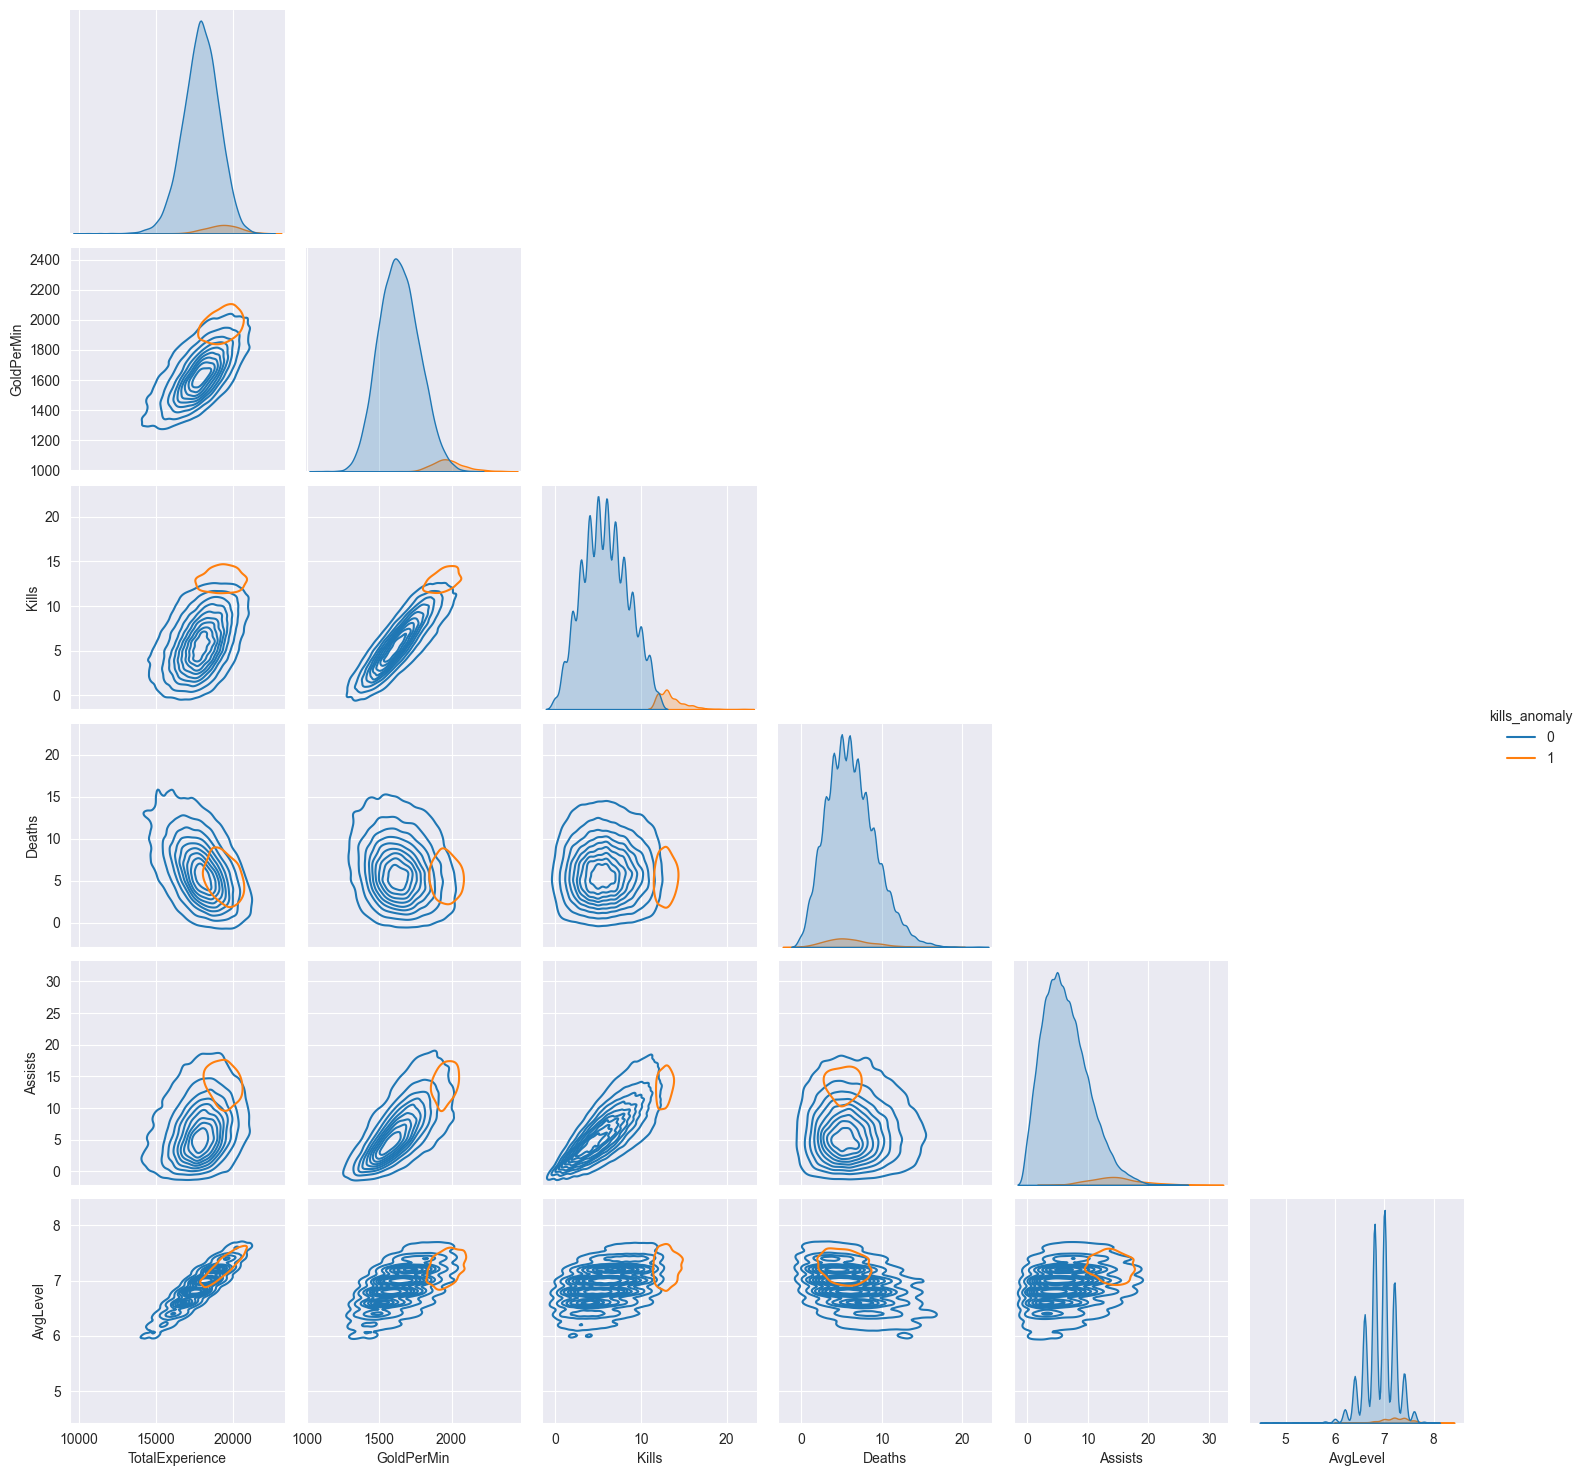

In [19]:
first_five = ['TotalExperience', 'GoldPerMin','Kills', "Deaths", "Assists", "AvgLevel", "kills_anomaly"]
sns.pairplot(data=long_df[first_five], hue="kills_anomaly", kind="kde", corner=True)

### Enough with the analysis, let's create some classification models to predict which team wins!

In [20]:
def normalizer(input_data: pd.DataFrame) -> pd.DataFrame:
    mu = input_data.mean()
    sd = input_data.std()
    return (input_data - mu) / sd

In [21]:
skip_cols = ["blueWins","blueFirstBlood", "blueDragons", "blueHeralds", "blueEliteMonsters", "blueTowersDestroyed", "redFirstBlood", "redDragons", "redHeralds", "redEliteMonsters", "redTowersDestroyed"]

df_standardize = df.copy()

for col in df_standardize.drop(columns=["gameId"]).columns:
    if col not in skip_cols:
        df_standardize[col] = normalizer(df_standardize[col])

df_standardize.head()


gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin
0  4519157822         0         0.316980           -0.379256               1   0.935254   -0.046924     1.071441                  0            0            0                    0       0.460156     -1.035582            -0.740602               -0.992732                     -1.465877      0.256215            0.013341     -0.992732        0.460156       -0.399186           1.532415              0 -0.046924   0.935254    0.329479                 0           0           0                   0      0.052290    -0.410454           -0.763176              -0.928694                     0.367666    -0.256215          -0.013341    -0.928694       0.052290
1  4523371949         0        -0.570963           -0.839026               0  -0.393196   -0.387777    -0.404748                  0            0            0                    0      -1.166733     -1.035582            -1.385320               -1.953459                     -0.758684     -1.191194           -0.593312     -1.953459       -1.166733       -0.561723          -0.805829              1 -0.387777  -0.393196   -1.148130                 2           1           1                   1      0.758580    -0.410454           -0.436958               1.033731                     0.068500     1.191194           0.593312     1.033731       0.758580
2  4521474530         0        -0.404474           -1.298797               0   0.271029    1.657340    -0.650779                  1            1            0                    0      -0.254294     -1.691007            -1.421971               -1.404472                     -0.455601     -0.483590           -0.520410     -1.404472       -0.254294       -0.399186           0.129469              1  1.657340   0.271029    1.807089                 0           0           0                   0      0.533882    -0.410454           -0.590472              -0.654867                    -2.324826     0.483590           0.520410    -0.654867       0.533882
3  4524384067         0         1.149426           -0.839026               0  -0.725309   -0.387777    -0.404748                  1            0            1                    0      -0.876915      0.275266             0.021565               -0.718238                      0.453648     -0.544323            0.013862     -0.718238       -0.876915       -0.399186          -0.338180              1 -0.387777  -0.725309    0.822016                 0           0           0                   0     -0.007406     0.244615           -0.000609               0.805542                    -0.430109     0.544323          -0.013862     0.805542      -0.007406
4  4436033771         0         2.925312            0.540285               0  -0.061084   -0.046924    -0.158716                  0            0            0                    0      -0.067378      0.275266             0.512185               -0.306498                      0.655703     -0.415112            0.137276     -0.306498       -0.067378       -0.290829          -0.338180              1 -0.046924  -0.061084    0.083211                 1           1           0                   0      0.613700     0.244615            0.293070               0.349164                     1.564329     0.415112          -0.137276     0.349164       0.613700

In [22]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, fbeta_score, precision_recall_fscore_support, roc_auc_score, roc_curve, RocCurveDisplay, auc
from scipy.stats import pointbiserialr

# Modeling
In this part we'll try 4 different approaches. <br>
1. All features of the dataset <br>
2. Only features with point-biserial correlation > 0.3 <br>
3. Only features with point-biserial correlation > 0.3 and creating dummy variables for outliers
4. All features of the dataset + 3 new embedding features from Principal Component Analysis <br>


Because we have binary variables (0/1), discrete and continuous ones we can't really rely on linear correlation coefficients.<br>
That's why we'll use the point-biserial correlation. This is just a hypothesis to test for modeling to extract the most relevant ones. <br>
<br>
We'll start by grabbing the Point-Biserial correlations

In [23]:
corrcol, coef = [], []
skip_cols = ["blueWins","blueFirstBlood", "blueDragons", "blueHeralds", "blueEliteMonsters", "blueTowersDestroyed", "redFirstBlood", "redDragons", "redHeralds", "redEliteMonsters", "redTowersDestroyed"]

for col in df.drop(columns=["gameId", "blueWins"]).columns:
    if col not in skip_cols:
        vals = pointbiserialr(df[col], df["blueWins"])
        if np.abs(vals[0]) > 0.3:
                
            corrcol.append(col)
            coef.append(vals[0])

predictors_to_use = pd.DataFrame([corrcol, coef]).T.rename(columns={0:"Predictor", 1:"PBC_val"})
predictor_list = predictors_to_use.Predictor.to_list()
predictors_to_use

Predictor   PBC_val
0             blueKills  0.337358
1            blueDeaths -0.339297
2         blueTotalGold  0.417213
3          blueAvgLevel   0.35782
4   blueTotalExperience  0.396141
5          blueGoldDiff  0.511119
6    blueExperienceDiff  0.489558
7        blueGoldPerMin  0.417213
8              redKills -0.339297
9             redDeaths  0.337358
10         redTotalGold -0.411396
11          redAvgLevel -0.352127
12   redTotalExperience -0.387588
13          redGoldDiff -0.511119
14    redExperienceDiff -0.489558
15        redGoldPerMin -0.411396

Now we extract the PCA features

In [24]:
pca = PCA(n_components = 3)
Xpca = pca.fit(df_standardize.drop(columns=["gameId", "blueWins"])).transform(df_standardize.drop(columns=["gameId", "blueWins"]))
df_with_pca = pd.concat([df_standardize, pd.DataFrame(Xpca)], axis=1).rename(columns={0:"pca1", 1:"pca2", 2:"pca3"})

Have a look how 38 features reduced to only 3 looks like in 3D space

In [25]:
fig = px.scatter_3d(x=Xpca[:, 0], y=Xpca[:, 1], z=Xpca[:, 2], color=df_standardize.blueWins)
fig.update_layout(width=800, height=600, title="PCA with n=3 colored by if blue team wins or not")
fig.show()

Let's assign the new datasets and also have a look at the correlation heatmap

Text(0.5, 1.0, 'Heatmap of linear correlations between the features')

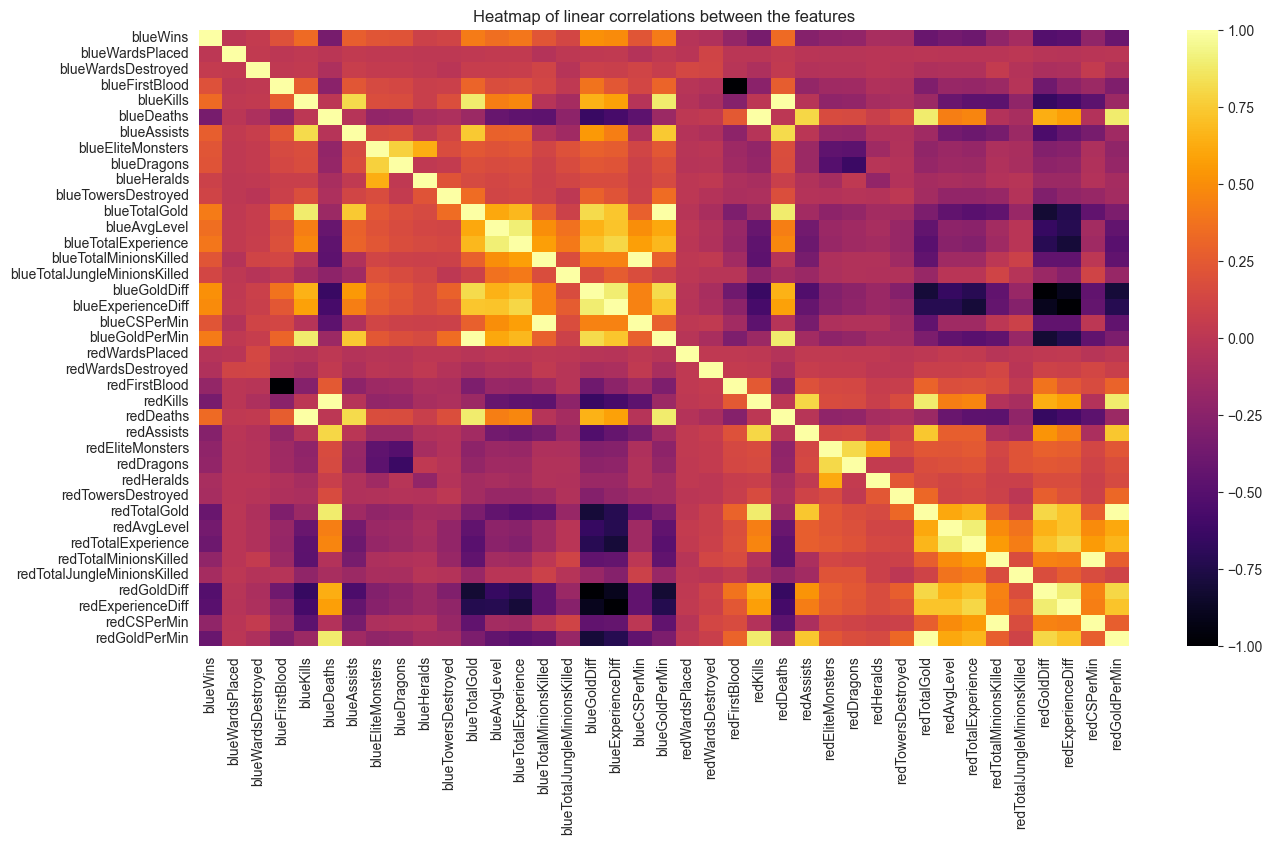

In [26]:
X = df_standardize.drop(columns=["gameId", "blueWins"]).copy()
y = df_standardize["blueWins"].copy()

X_pbc = df_standardize.drop(columns=["gameId", "blueWins"]).copy()
X_pbc = X[predictor_list]
y_pbc = df_standardize["blueWins"].copy()

X_pbc_outliers = df.drop(columns=["gameId", "blueWins"]).copy()
X_pbc_outliers = X_pbc_outliers[predictor_list]
y_pbc_outliers = df["blueWins"].copy()

X_pca = df_with_pca.drop(columns=["gameId", "blueWins"]).copy()
y_pca = df_with_pca["blueWins"].copy()

plt.figure(figsize=(15, 8))
sns.heatmap(df_standardize.drop(columns=["gameId"]).corr(), cmap="inferno")  
plt.title("Heatmap of linear correlations between the features") 

Create the outlier features

In [27]:
for col in X_pbc_outliers.columns:
    threshold = X_pbc_outliers[col].quantile(.75) + 1.5*(X_pbc_outliers[col].quantile(.75) - X_pbc_outliers[col].quantile(.25) )

    if np.sum( np.where(X_pbc_outliers[col] > threshold, 1, 0) ) > len(X_pbc_outliers) * 0.01:
        col_outlier = col
        print(col_outlier)
        X_pbc_outliers[col_outlier+"_outlier"] = np.where(X_pbc_outliers[col_outlier] > threshold, 1, 0)

skip_cols = ["blueFirstBlood", "blueDragons", "blueHeralds", "blueEliteMonsters", "blueTowersDestroyed", "redFirstBlood", "redDragons", "redHeralds", "redEliteMonsters", "redTowersDestroyed", "blueTotalGold", "blueGoldPerMin"]

for col in X_pbc_outliers.columns:
    if col not in skip_cols:
        X_pbc_outliers[col] = normalizer(X_pbc_outliers[col])



blueTotalGold
blueGoldPerMin


#### Create the model pipeline and train/test pipeline

In [28]:
models = {
    'SVM': SVC(C=1.5, kernel="sigmoid", gamma="auto"),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", min_samples_leaf=2),
    'Random Forest': RandomForestClassifier(criterion="entropy", min_samples_leaf=2, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier()
}

def make_pipeline(classifier):
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    return pipeline


def train_test_pipeline(model: dict,
 number_of_splits: int, 
 test_size: float, 
 X_input: pd.DataFrame, 
 Y_input: pd.DataFrame, 
 shuffle=True) -> dict:
 
    results = {}
    KFOLD = number_of_splits

    for name, mod in model.items():
        pipeline = make_pipeline(mod)

        fold_acc = []
        fold_f1 = []
        fold_fbeta = []

        for _ in range(KFOLD):
            X_train, X_test, y_train, y_test = train_test_split(X_input, Y_input, test_size=test_size, shuffle=shuffle)

            pipeline.fit(X_train, y_train)
            preds = pipeline.predict(X_test)

            accuracy = accuracy_score(y_test, preds)
            f1score = f1_score(y_test, preds)
            fbetascore = fbeta_score(y_test, preds, average="binary", beta=.5)

            fold_acc.append(accuracy)
            fold_f1.append(f1score )
            fold_fbeta.append(fbetascore)

        avg_acc, avg_f1, avg_fbeta = np.mean(fold_acc), np.mean(fold_f1), np.mean(fold_fbeta)

        results[name] = fold_acc
        print(f'{name}: Average Accuracy: {avg_acc:.2f} | Average F1-score: {avg_f1:.2f} | Average F-Beta: {avg_fbeta:.2f}')

    return results

In [29]:
multi_X = [X, X_pbc, X_pbc_outliers, X_pca]
multi_Y = [y, y_pbc, y_pbc_outliers, y_pca]
titles = ["X", "X_pbc", "X_pbc_outliers", "X_pca"]
results = {}
for x, y, title in zip(multi_X, multi_Y, titles):
    
    print(f"Using {len(x.columns)} features")
    results[title] = train_test_pipeline(models, number_of_splits=10, test_size=.35, X_input=x, Y_input=y, shuffle=True)
    print("---"*30)
    





Using 38 features
SVM: Average Accuracy: 0.66 | Average F1-score: 0.66 | Average F-Beta: 0.66
Logistic Regression: Average Accuracy: 0.73 | Average F1-score: 0.73 | Average F-Beta: 0.73
Decision Tree: Average Accuracy: 0.63 | Average F1-score: 0.63 | Average F-Beta: 0.63
Random Forest: Average Accuracy: 0.72 | Average F1-score: 0.72 | Average F-Beta: 0.72
AdaBoost: Average Accuracy: 0.72 | Average F1-score: 0.72 | Average F-Beta: 0.73
------------------------------------------------------------------------------------------
Using 16 features
SVM: Average Accuracy: 0.62 | Average F1-score: 0.62 | Average F-Beta: 0.62
Logistic Regression: Average Accuracy: 0.73 | Average F1-score: 0.73 | Average F-Beta: 0.73
Decision Tree: Average Accuracy: 0.63 | Average F1-score: 0.62 | Average F-Beta: 0.64
Random Forest: Average Accuracy: 0.71 | Average F1-score: 0.71 | Average F-Beta: 0.71
AdaBoost: Average Accuracy: 0.72 | Average F1-score: 0.72 | Average F-Beta: 0.72
-------------------------------

#### Plot the different accuracy scores to see which model and which dataset performs the best

In [30]:
results_df = pd.DataFrame(results)
results_df

SVM                                Logistic Regression                                      Decision Tree                                      Random Forest                                           AdaBoost
X               [0.6648351648351648, 0.6518218623481782, 0.652...  [0.7426257952573742, 0.7362637362637363, 0.735...  [0.6318681318681318, 0.6243493348756507, 0.640...  [0.7125506072874493, 0.7174667437825333, 0.727...  [0.7322151532677849, 0.7270098322729902, 0.721...
X_pbc           [0.6310005783689995, 0.6231925968768074, 0.630...  [0.7255639097744361, 0.7218045112781954, 0.728...  [0.6295546558704453, 0.6422787738577213, 0.629...  [0.7142857142857143, 0.7209369577790631, 0.714...  [0.7322151532677849, 0.7212261422787739, 0.729...
X_pbc_outliers  [0.4942163100057837, 0.49884326200115675, 0.48...  [0.7209369577790631, 0.739733950260266, 0.7264...  [0.6182764603817236, 0.6321573163678427, 0.617...  [0.7050318102949682, 0.7125506072874493, 0.707...  [0.7270098322729902, 0.7186234817813765, 0.709...
X_pca           [0.6324465008675535, 0.628397917871602, 0.6362...  [0.7226720647773279, 0.7377096587622903, 0.725...  [0.6431463273568536, 0.6388085598611914, 0.651...  [0.714864083285136, 0.7220936957779063, 0.7235...  [0.7330827067669173, 0.7235396182764604, 0.711...

In [ ]:
results_df2 = results_df.reset_index().rename(columns={"index":"model"}).T

In [53]:
max_score = []
dataset_str = []
model_str = []
for mod in results_df2["model"]:
    temp_df = results_df2.query(f"model == '{mod}'")
    for col in results_df2.columns[1:]:
        dataset_str.append(col)
        model_str.append(mod)
        max_score.append(temp_df[col].explode().max())

max_score_df = pd.DataFrame([dataset_str, model_str, max_score]).T.rename(columns={0:"model", 1:"dataset", 2:"max_score"}).sort_values(by="max_score", ascending=False).reset_index().drop(columns="index")
max_score_df["max_score"] = max_score_df["max_score"] *100
#Top-5
max_score_df.head()

model         dataset  max_score
0  Logistic Regression           X_pca  74.291498
1  Logistic Regression               X   74.26258
2  Logistic Regression  X_pbc_outliers  73.973395
3             AdaBoost           X_pca  73.742047
4  Logistic Regression           X_pbc  73.568537

Text(0, 0.5, 'Accuracy score')

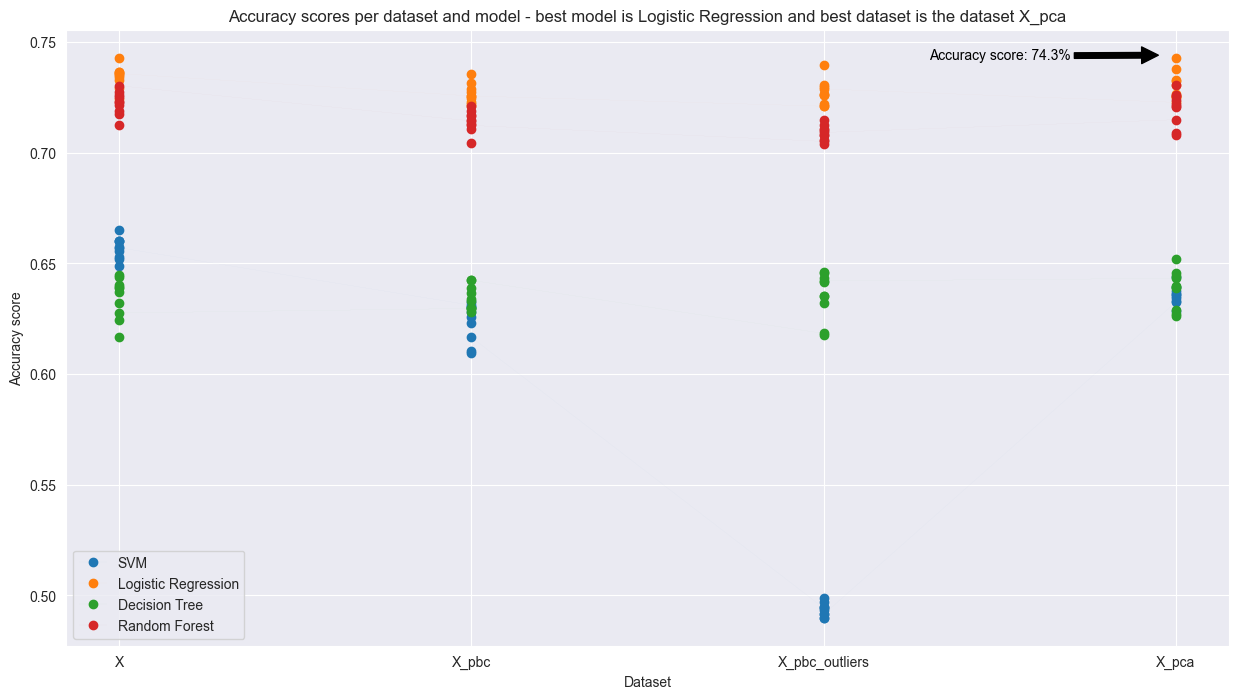

In [58]:
plt.figure(figsize=(15, 8))
for col, mod in zip(results_df.columns, results_df.index):
    plt.plot(results_df[col].explode(), label=col, marker='o', linestyle='--', linewidth=.01)
    plt.legend()

plt.title(f"Accuracy scores per dataset and model - best model is {max_score_df.model[0]} and best dataset is the dataset {max_score_df.dataset[0]}")
plt.annotate(f"Accuracy score: {round(max_score_df.max_score[0], 1)}%", xy=(2.95, .744), color="black", arrowprops=dict(color="black"), xytext=(2.3, 0.742))
plt.xlabel("Dataset")
plt.ylabel("Accuracy score")

# Conclusion
Our best model came out to be a Logistic regression with our augmented dataset called X_pca. <br>
This dataset was augmented with embedding vectors from a PCA model. <br> 
If we would be to test the model in a real-world setting, we would expect that our accuracy would hold with an accuracy of over <b>70%</b>.<br>
<br>
Since we randomly split our dataset 10 times with shuffling so we mix them up every split, and did that for each dataset and for each model, we should be able to conclude this hold given the dataset!